# Big Mart Sales Prediction

In [416]:
# Importing Libraries

In [417]:
import numpy as np
import pandas as pd

In [418]:
# Reading Dataset

In [419]:
big_mart=pd.read_csv('train.csv')

In [420]:
# Displaying Top 10 observations

In [421]:
big_mart.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [422]:
# identifying the shape of dataset

In [423]:
big_mart.shape

(8523, 12)

In [424]:
# This dataset has 8523 oservations 12 columns

In [425]:
# 5 point Summary

In [426]:
big_mart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [427]:
# Information about Dataset

In [428]:
big_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [429]:
# Dimension of dataset

In [430]:
big_mart.ndim

2

In [431]:
# Dataset datatypes

In [432]:
big_mart.dtypes[big_mart.dtypes!='object']

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [433]:
big_mart.dtypes[big_mart.dtypes=='object']

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [434]:
# Value counting

In [435]:
for i in big_mart.columns:
    if big_mart[i].dtypes=='object':
        print(big_mart[i].value_counts())
        print('\n')
    else:
        continue

FDW13    10
FDG33    10
NCY18     9
NCL31     9
FDT07     9
         ..
FDK57     1
FDQ60     1
FDN52     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


Mediu

In [436]:
# I found some mistakes in Item fat content, there should be any one type of Item dat content Low fat and regular
# We should replace all mistakes with Low fat, regular.

In [437]:
big_mart['Item_Fat_Content'].replace({'Low Fat':'Low fat','LF':'Low fat','low fat':'Low fat','reg':'Regular'},inplace=True)

In [438]:
for i in big_mart.columns:
    if big_mart[i].dtypes=='object':
        print(big_mart[i].value_counts())
        print('\n')
    else:
        continue

FDW13    10
FDG33    10
NCY18     9
NCL31     9
FDT07     9
         ..
FDK57     1
FDQ60     1
FDN52     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Low fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


Medium    2793
Small     2388
High       932
Name: Ou

## Missing value treatment

In [439]:
big_mart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [440]:
# We have Item_Weight, Outlet_Size has missing values

# Item weight filling with mean values

In [441]:
#big_mart['Item_Weight']=big_mart['Item_Weight'].fillna(big_mart['Item_Weight'].mean())

In [442]:
#big_mart.isnull().sum()

# Outlet size filling with mode values

In [443]:
#big_mart['Outlet_Size']=big_mart['Outlet_Size'].fillna(big_mart['Outlet_Size'].mode()[0])

In [444]:
#big_mart.isnull().sum()

## Encoding - Target Encoding

In [445]:
for i in big_mart.columns:
    if big_mart[i].dtypes=='object':
        print(big_mart[i].value_counts())
        print('\n')
    else:
        continue

FDW13    10
FDG33    10
NCY18     9
NCL31     9
FDT07     9
         ..
FDK57     1
FDQ60     1
FDN52     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Low fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


Medium    2793
Small     2388
High       932
Name: Ou

In [446]:
big_mart["Item_Identifier_encoded"] = big_mart.groupby("Item_Identifier")["Item_Outlet_Sales"].transform("mean")

In [447]:
big_mart["Item_Fat_Content_encoded"] = big_mart.groupby("Item_Fat_Content")["Item_Outlet_Sales"].transform("mean")

In [448]:
big_mart["Item_Type_encoded"] = big_mart.groupby("Item_Type")["Item_Outlet_Sales"].transform("mean")

In [449]:
big_mart["Outlet_Identifier_encoded"] = big_mart.groupby("Outlet_Identifier")["Item_Outlet_Sales"].transform("mean")

In [450]:
big_mart["Outlet_Size_encoded"] = big_mart.groupby("Outlet_Size")["Item_Outlet_Sales"].transform("mean")

In [451]:
big_mart["Outlet_Location_Type_encoded"] = big_mart.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].transform("mean")

In [452]:
big_mart["Outlet_Type_encoded"] = big_mart.groupby("Outlet_Type")["Item_Outlet_Sales"].transform("mean")

In [453]:
big_mart_clean=big_mart.drop(['Item_Identifier',"Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type"],axis=1)

In [454]:
big_mart_clean.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_encoded,Item_Fat_Content_encoded,Item_Type_encoded,Outlet_Identifier_encoded,Outlet_Size_encoded,Outlet_Location_Type_encoded,Outlet_Type_encoded
0,9.30,0.016047,249.8092,1999,3735.1380,5198.067050,2157.711534,2232.542597,2348.354635,2681.603542,1876.909159,2316.181148
1,5.92,0.019278,48.2692,2009,443.4228,862.211000,2224.561170,2006.511735,1995.498739,2681.603542,2279.627651,1995.498739
2,17.50,0.016760,141.6180,1999,2097.2700,1478.076000,2157.711534,2158.977911,2348.354635,2681.603542,1876.909159,2316.181148
3,19.20,0.000000,182.0950,1998,732.3800,3021.067500,2224.561170,2289.009592,339.351662,NaN,2279.627651,339.828500
4,8.93,0.000000,53.8614,1987,994.7052,653.926567,2157.711534,2258.784300,2298.995256,2298.995256,2279.627651,2316.181148


# Alternate method
# Prediction of missing Values

In [455]:
# Item weight

In [456]:
data=big_mart_clean
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_encoded,Item_Fat_Content_encoded,Item_Type_encoded,Outlet_Identifier_encoded,Outlet_Size_encoded,Outlet_Location_Type_encoded,Outlet_Type_encoded
0,9.30,0.016047,249.8092,1999,3735.1380,5198.067050,2157.711534,2232.542597,2348.354635,2681.603542,1876.909159,2316.181148
1,5.92,0.019278,48.2692,2009,443.4228,862.211000,2224.561170,2006.511735,1995.498739,2681.603542,2279.627651,1995.498739
2,17.50,0.016760,141.6180,1999,2097.2700,1478.076000,2157.711534,2158.977911,2348.354635,2681.603542,1876.909159,2316.181148
3,19.20,0.000000,182.0950,1998,732.3800,3021.067500,2224.561170,2289.009592,339.351662,NaN,2279.627651,339.828500
4,8.93,0.000000,53.8614,1987,994.7052,653.926567,2157.711534,2258.784300,2298.995256,2298.995256,2279.627651,2316.181148


In [457]:
data.isnull().sum()

Item_Weight                     1463
Item_Visibility                    0
Item_MRP                           0
Outlet_Establishment_Year          0
Item_Outlet_Sales                  0
Item_Identifier_encoded            0
Item_Fat_Content_encoded           0
Item_Type_encoded                  0
Outlet_Identifier_encoded          0
Outlet_Size_encoded             2410
Outlet_Location_Type_encoded       0
Outlet_Type_encoded                0
dtype: int64

In [458]:
data = data[["Item_Weight","Item_Visibility","Item_MRP","Outlet_Establishment_Year","Item_Identifier_encoded","Item_Fat_Content_encoded","Item_Type_encoded","Outlet_Identifier_encoded","Outlet_Size_encoded","Outlet_Location_Type_encoded","Outlet_Type_encoded"]]

In [459]:
test_data = data[data["Item_Weight"].isnull()]
data=data.dropna()

In [460]:
y_train = data["Item_Weight"]
X_train = data.drop("Item_Weight", axis=1)
X_test = test_data.drop("Item_Weight", axis=1)

In [461]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [462]:
data["Item_Weight"].isnull().sum()

0

In [463]:
y_pred = model.predict(X_test)

In [464]:
y_pred.shape

(1463,)

In [465]:
y_pred

array([13.9121319 , 13.76948331, 13.09413569, ..., 13.46106949,
       11.8212654 , 13.82025876])

In [466]:
big_mart_clean['Item_Weight'][big_mart_clean[big_mart_clean['Item_Weight'].isnull()].index]=y_pred

<ipython-input-466-7ae04e9fdecf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_mart_clean['Item_Weight'][big_mart_clean[big_mart_clean['Item_Weight'].isnull()].index]=y_pred


In [467]:
big_mart_clean.isnull().sum()

Item_Weight                        0
Item_Visibility                    0
Item_MRP                           0
Outlet_Establishment_Year          0
Item_Outlet_Sales                  0
Item_Identifier_encoded            0
Item_Fat_Content_encoded           0
Item_Type_encoded                  0
Outlet_Identifier_encoded          0
Outlet_Size_encoded             2410
Outlet_Location_Type_encoded       0
Outlet_Type_encoded                0
dtype: int64

In [468]:
# Outlet_Size_encoded

In [469]:
data1=big_mart_clean

In [470]:
data1 = data1[["Item_Weight","Item_Visibility","Item_MRP","Outlet_Establishment_Year","Item_Identifier_encoded","Item_Fat_Content_encoded","Item_Type_encoded","Outlet_Identifier_encoded","Outlet_Size_encoded","Outlet_Location_Type_encoded","Outlet_Type_encoded"]]

In [471]:
test_data1 = data1[data1["Outlet_Size_encoded"].isnull()]
data1=data1.dropna()

In [472]:
y_train = data1["Outlet_Size_encoded"]
X_train = data1.drop("Outlet_Size_encoded", axis=1)
X_test = test_data1.drop("Outlet_Size_encoded", axis=1)

In [473]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [474]:
X_test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_encoded,Item_Fat_Content_encoded,Item_Type_encoded,Outlet_Identifier_encoded,Outlet_Location_Type_encoded,Outlet_Type_encoded
3,19.200,0.000000,182.0950,1998,3021.067500,2224.561170,2289.009592,339.351662,2279.627651,339.828500
8,16.200,0.016687,96.9726,2002,1384.198200,2224.561170,2132.867744,2192.384798,2323.990559,2316.181148
9,19.200,0.094450,187.8214,2007,1997.266840,2224.561170,2132.867744,2340.675263,2323.990559,2316.181148
25,13.000,0.099887,45.9060,2007,671.126400,2157.711534,2258.784300,2340.675263,2323.990559,2316.181148
28,5.925,0.161467,45.5086,1998,516.185229,2224.561170,2232.542597,339.351662,2279.627651,339.828500
...,...,...,...,...,...,...,...,...,...,...
8502,8.420,0.070712,216.4192,2002,1617.894000,2157.711534,2258.784300,2192.384798,2323.990559,2316.181148
8508,11.350,0.043246,199.4742,2002,2468.520080,2224.561170,2289.009592,2192.384798,2323.990559,2316.181148
8509,8.100,0.214306,213.9902,1998,4247.804000,2157.711534,2289.009592,339.351662,2279.627651,339.828500
8514,15.000,0.054489,57.5904,2002,770.045257,2224.561170,2225.194904,2192.384798,2323.990559,2316.181148


In [475]:
y_pred = model.predict(X_test)

In [476]:
y_pred

array([2023.60920022, 2753.4533769 , 2452.43949938, ..., 2046.12734727,
       2763.60808937, 2748.05938417])

In [477]:
y_pred.shape

(2410,)

In [478]:
big_mart_clean['Outlet_Size_encoded'][big_mart_clean[big_mart_clean['Outlet_Size_encoded'].isnull()].index]=y_pred

<ipython-input-478-bd782cf7289a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_mart_clean['Outlet_Size_encoded'][big_mart_clean[big_mart_clean['Outlet_Size_encoded'].isnull()].index]=y_pred


In [479]:
big_mart_clean.isnull().sum()

Item_Weight                     0
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales               0
Item_Identifier_encoded         0
Item_Fat_Content_encoded        0
Item_Type_encoded               0
Outlet_Identifier_encoded       0
Outlet_Size_encoded             0
Outlet_Location_Type_encoded    0
Outlet_Type_encoded             0
dtype: int64

In [480]:
# Success

## Exploratory data analysis

In [481]:
import seaborn as sns
import matplotlib.pyplot as plt

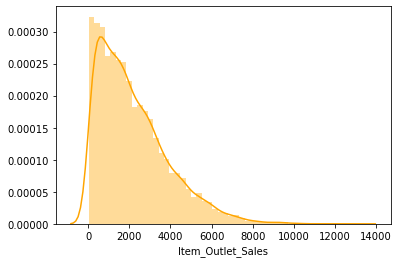

In [482]:
sns.distplot(big_mart_clean['Item_Outlet_Sales'] , color = 'orange')

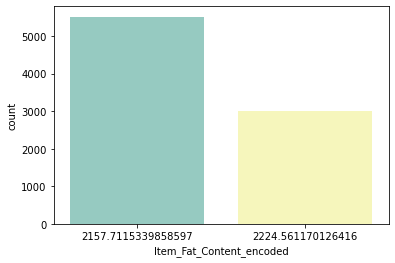

In [483]:
sns.countplot(big_mart_clean['Item_Fat_Content_encoded'] , palette="Set3")

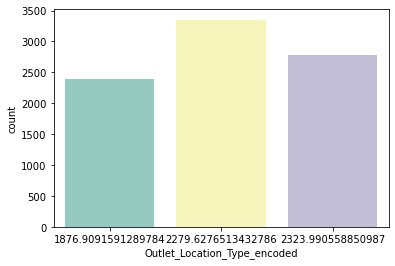

In [484]:
sns.countplot(big_mart_clean['Outlet_Location_Type_encoded'] , palette="Set3")

## Correlation

In [485]:
big_mart_clean.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_encoded,Item_Fat_Content_encoded,Item_Type_encoded,Outlet_Identifier_encoded,Outlet_Size_encoded,Outlet_Location_Type_encoded,Outlet_Type_encoded
Item_Weight,1.000000,-0.030492,0.030534,-0.019249,0.051712,0.029739,-0.026467,0.055363,0.073343,0.039291,0.030997,0.072916
Item_Visibility,-0.030492,1.000000,-0.001315,-0.074834,-0.128625,-0.029835,0.047314,0.025604,-0.246920,-0.124356,-0.065642,-0.247928
Item_MRP,0.030534,-0.001315,1.000000,0.005020,0.567574,0.868526,0.006063,0.102678,-0.000221,-0.011732,0.001378,-0.000551
Outlet_Establishment_Year,-0.019249,-0.074834,0.005020,1.000000,-0.049135,0.002201,0.003151,0.002311,-0.100121,0.144871,0.250128,-0.111576
Item_Outlet_Sales,0.051712,-0.128625,0.567574,-0.049135,1.000000,0.653482,0.018719,0.068843,0.490755,0.217813,0.111828,0.489464
Item_Identifier_encoded,0.029739,-0.029835,0.868526,0.002201,0.653482,1.000000,0.028644,0.105348,0.077491,0.028490,0.016595,0.077204
Item_Fat_Content_encoded,-0.026467,0.047314,0.006063,0.003151,0.018719,0.028644,1.000000,0.092992,0.002336,0.002404,-0.003347,0.002144
Item_Type_encoded,0.055363,0.025604,0.102678,0.002311,0.068843,0.105348,0.092992,1.000000,0.012147,0.014962,0.007669,0.011709
Outlet_Identifier_encoded,0.073343,-0.246920,-0.000221,-0.100121,0.490755,0.077491,0.002336,0.012147,1.000000,0.446500,0.227869,0.997371
Outlet_Size_encoded,0.039291,-0.124356,-0.011732,0.144871,0.217813,0.028490,0.002404,0.014962,0.446500,1.000000,0.267831,0.475818


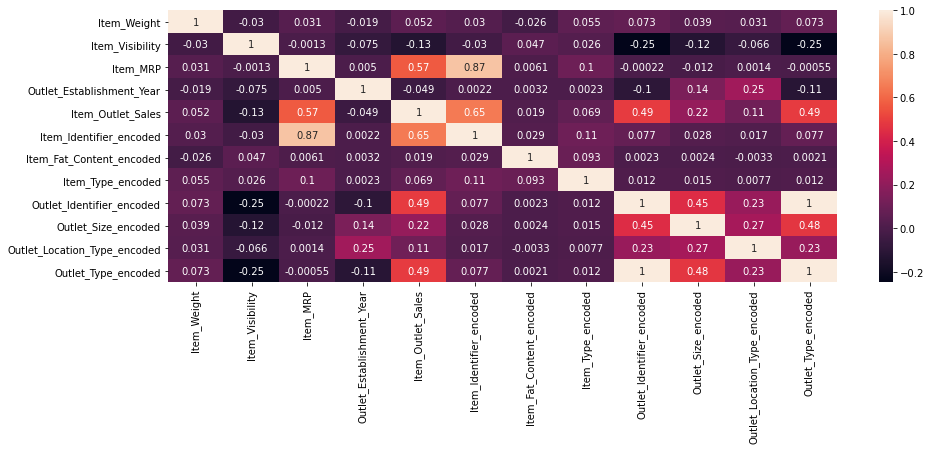

In [486]:
plt.figure(figsize=(15,5))
sns.heatmap(big_mart_clean.corr(), annot=True)

In [487]:
# pairplot

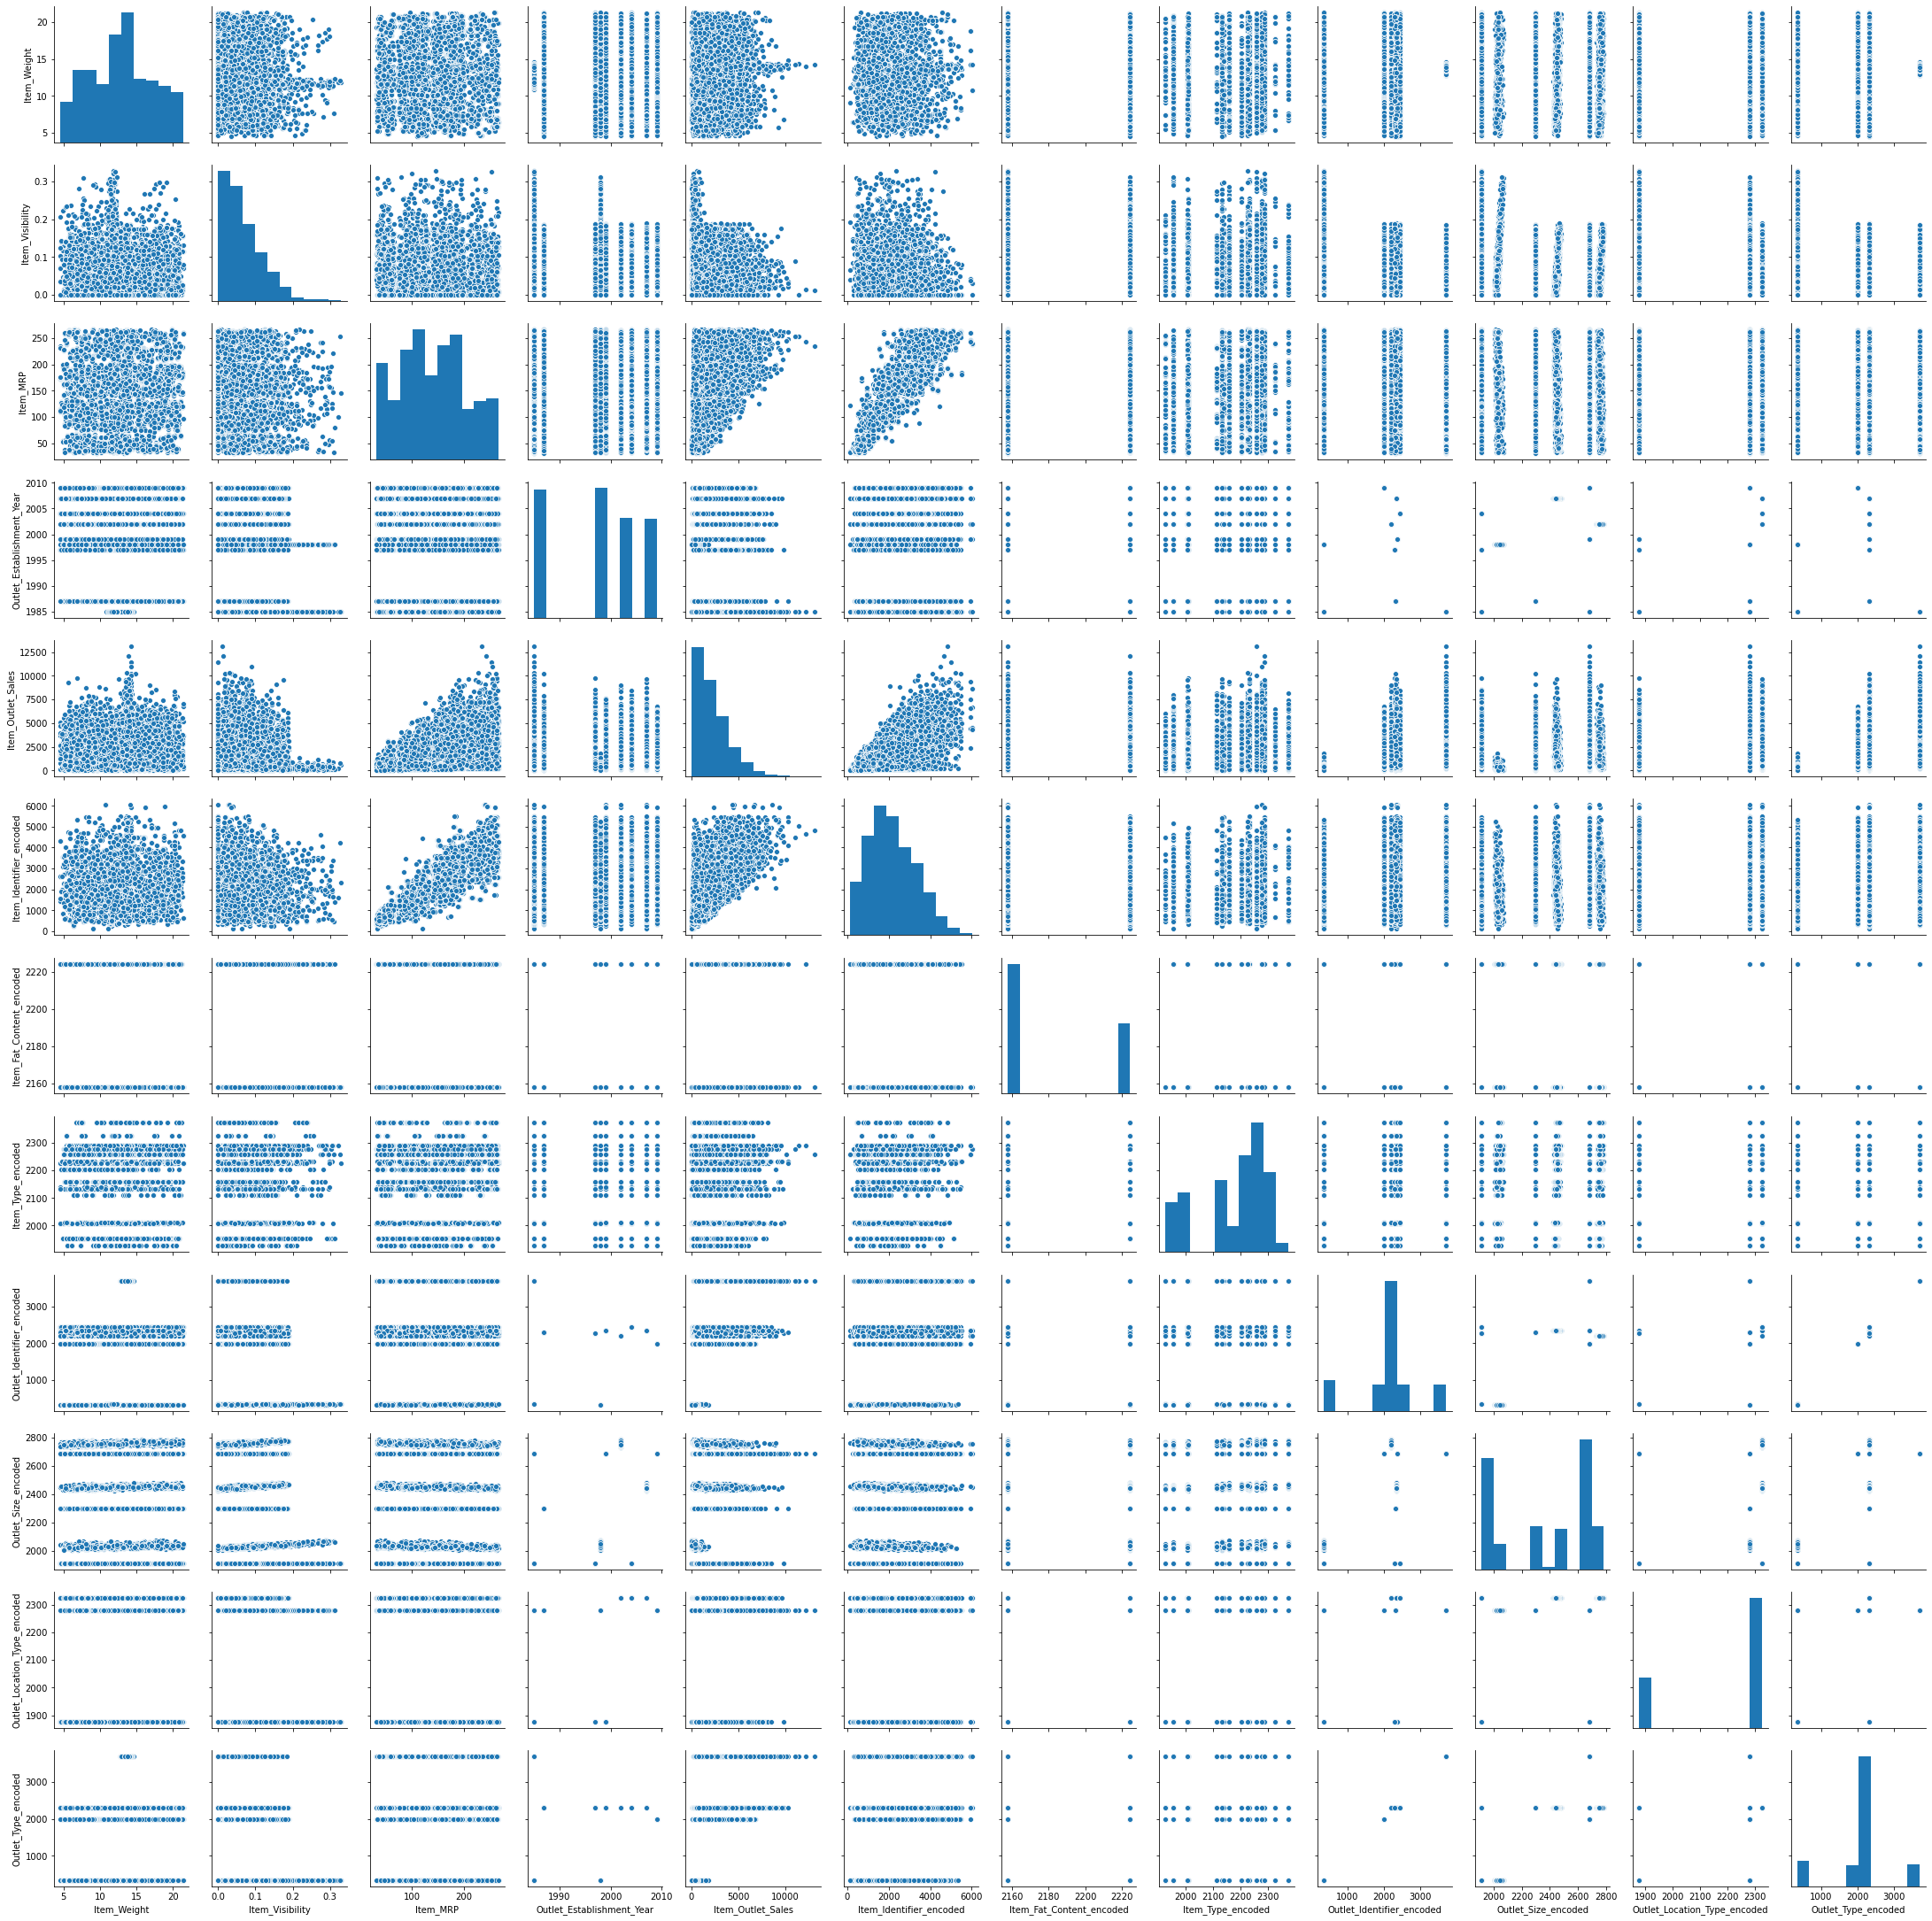

In [488]:
sns.pairplot(big_mart_clean)

In [489]:
# Standadization

In [490]:
from sklearn.preprocessing import StandardScaler

In [491]:
scaler = StandardScaler()
print(scaler.fit(big_mart_clean))

StandardScaler()


In [492]:
scaled_data = scaler.fit_transform(big_mart_clean)

In [493]:
big_mart_clean_scaled = pd.DataFrame(scaler.fit_transform(big_mart_clean),columns = big_mart_clean.columns)

In [494]:
big_mart_clean_scaled

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_encoded,Item_Fat_Content_encoded,Item_Type_encoded,Outlet_Identifier_encoded,Outlet_Size_encoded,Outlet_Location_Type_encoded,Outlet_Type_encoded
0,-0.845052,-0.970732,1.747454,0.139541,0.910601,2.705386,-0.738147,0.436299,0.199500,0.932489,-1.595092,0.161505
1,-1.641098,-0.908111,-1.489023,1.334103,-1.018440,-1.182922,1.354743,-1.487797,-0.221859,0.932489,0.515341,-0.222444
2,1.086183,-0.956917,0.010040,0.139541,-0.049238,-0.630627,-0.738147,-0.189923,0.199500,0.932489,-1.595092,0.161505
3,1.486561,-1.281758,0.660050,0.020085,-0.849103,0.753096,1.354743,0.916976,-2.199529,-1.004011,0.515341,-2.204757
4,-0.932193,-1.281758,-1.399220,-1.293934,-0.695373,-1.369708,-0.738147,0.659682,0.140558,-0.193540,0.515341,0.161505
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.418535,-0.181193,1.180783,-1.293934,0.349915,0.942743,-0.738147,0.817483,0.140558,-0.193540,0.515341,0.161505
8519,-1.061727,-0.371154,-0.527301,0.497909,-0.956402,0.408285,1.354743,-1.943563,0.013250,1.128071,0.747823,0.161505
8520,-0.538881,-0.599784,-0.897208,0.736822,-0.579100,-0.860700,-0.738147,-1.458101,0.307554,-1.332041,0.747823,0.161505
8521,-1.337282,1.532880,-0.607977,1.334103,-0.196725,-0.101817,1.354743,0.817483,-0.221859,0.932489,0.515341,-0.222444


In [495]:
X = big_mart_clean_scaled.drop(['Item_Outlet_Sales'],axis=1)
Y = big_mart_clean_scaled['Item_Outlet_Sales']

In [496]:
X,Y

(      Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
 0       -0.845052        -0.970732  1.747454                   0.139541   
 1       -1.641098        -0.908111 -1.489023                   1.334103   
 2        1.086183        -0.956917  0.010040                   0.139541   
 3        1.486561        -1.281758  0.660050                   0.020085   
 4       -0.932193        -1.281758 -1.399220                  -1.293934   
 ...           ...              ...       ...                        ...   
 8518    -1.418535        -0.181193  1.180783                  -1.293934   
 8519    -1.061727        -0.371154 -0.527301                   0.497909   
 8520    -0.538881        -0.599784 -0.897208                   0.736822   
 8521    -1.337282         1.532880 -0.607977                   1.334103   
 8522     0.450289        -0.411936 -1.052261                  -0.099372   
 
       Item_Identifier_encoded  Item_Fat_Content_encoded  Item_Type_encoded  \
 0     

In [497]:
# Treatment of multicollinearity

In [498]:
# VIF

In [499]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [500]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(by='VIF Factor')

,VIF Factor,features
0,1.011026,Item_Weight
5,1.014136,Item_Fat_Content_encoded
6,1.024395,Item_Type_encoded
1,1.083818,Item_Visibility
9,1.172054,Outlet_Location_Type_encoded
3,1.246524,Outlet_Establishment_Year
8,1.843742,Outlet_Size_encoded
2,4.160970,Item_MRP
4,4.188846,Item_Identifier_encoded
7,259.498377,Outlet_Identifier_encoded


In [501]:
X1=X.drop(['Outlet_Identifier_encoded','Outlet_Type_encoded'],axis=1)

In [502]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif["features"] = X1.columns
vif.sort_values(by='VIF Factor')

,VIF Factor,features
0,1.008356,Item_Weight
5,1.014055,Item_Fat_Content_encoded
6,1.024264,Item_Type_encoded
1,1.026112,Item_Visibility
3,1.078797,Outlet_Establishment_Year
7,1.103968,Outlet_Size_encoded
8,1.134539,Outlet_Location_Type_encoded
2,4.111688,Item_MRP
4,4.121054,Item_Identifier_encoded


In [503]:
X = big_mart_clean_scaled.drop(['Item_Outlet_Sales','Outlet_Identifier_encoded','Outlet_Type_encoded'],axis=1)
Y = big_mart_clean_scaled['Item_Outlet_Sales']

# Model Building

In [ ]:
# Baseline algorithm test

In [387]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=42)

In [277]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [278]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

In [283]:
#import sklearn
#sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [288]:
from sklearn.metrics import mean_squared_error

In [404]:
def train(model, x_tr, y_tr,x_ts,y_ts):
    model.fit(x_tr, y_tr)
    pred = model.predict(x_ts)
    
    cv_score = cross_val_score(model, x_tr, y_tr, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y_ts,pred))
    print("CV Score:", cv_score)

In [405]:
model = LinearRegression(normalize=True)
train(model, X_train, Y_train,X_test,Y_test)


Model Report
MSE: 0.5016673401468664
CV Score: 0.5186596854512459


In [406]:
model = Ridge(normalize=True)
train(model, X_train, Y_train,X_test,Y_test)


Model Report
MSE: 0.5552938239508005
CV Score: 0.6004957740147423


In [407]:
model = Lasso(normalize=True)
train(model,X_train, Y_train,X_test,Y_test)


Model Report
MSE: 0.9372452884428965
CV Score: 1.0161433400533322


In [408]:
model = DecisionTreeRegressor()
train(model,X_train, Y_train,X_test,Y_test)


Model Report
MSE: 0.6656299470552021
CV Score: 0.7164233343845827


In [409]:
model = KNeighborsRegressor()
train(model,X_train, Y_train,X_test,Y_test)

Model Report
MSE: 0.40251281535706485
CV Score: 0.4490404138078984


In [411]:
model = KNeighborsRegressor()
model.fit(X_train, Y_train)
predictions=model.predict(X_test)

In [412]:
pd.DataFrame({'Prediction': predictions, 'Test Data' : Y_test})

,Prediction,Test Data
7503,-0.648629,-0.256812
2957,-0.786128,-1.069164
7031,-0.801033,-1.057068
1084,1.560872,2.108058
856,0.691945,0.102932
...,...,...
7205,-0.161921,0.482185
3257,0.125406,-0.756241
6346,-0.867988,-0.909581
6318,-0.915902,-1.130031
